# 데이터 준비

In [8]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(len(fish))
fish.head()

159


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


입력 피쳐와 타겟 피쳐 분리

In [7]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species']

print(fish_input)
print(fish_target)

     Weight  Length  Diagonal   Height   Width
0     242.0    25.4      30.0  11.5200  4.0200
1     290.0    26.3      31.2  12.4800  4.3056
2     340.0    26.5      31.1  12.3778  4.6961
3     363.0    29.0      33.5  12.7300  4.4555
4     430.0    29.0      34.0  12.4440  5.1340
..      ...     ...       ...      ...     ...
154    12.2    12.2      13.4   2.0904  1.3936
155    13.4    12.4      13.5   2.4300  1.2690
156    12.2    13.0      13.8   2.2770  1.2558
157    19.7    14.3      15.2   2.8728  2.0672
158    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 5 columns]
0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object


In [15]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

print(len(train_input))
print(len(test_input))

119
40


In [16]:
train_input

,Weight,Length,Diagonal,Height,Width
26,720.0,35.0,40.6,16.3618,6.0900
137,500.0,45.0,48.0,6.9600,4.8960
146,7.5,10.5,11.6,1.9720,1.1600
90,110.0,22.0,23.5,5.5225,3.9950
66,140.0,20.7,23.2,8.5376,3.2944
...,...,...,...,...,...
71,300.0,26.0,29.0,11.3680,4.2340
106,250.0,28.0,29.4,7.8204,4.2042
14,600.0,32.0,37.2,14.9544,5.1708
92,150.0,22.5,24.0,6.7920,3.6240


---
# 데이터 전처리 및 성능(`.score()`)확인

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_input_scaled = ss.transform(train_input)
test_input_scaled = ss.transform(test_input)

train_input_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_input_scaled, train_target)

print(kn.score(train_input_scaled, train_target))
print(kn.score(test_input_scaled, test_target))

0.8907563025210085
0.85


점수는 일단 신경쓰지 말자.

### `score()`는 개별 샘플의 타겟을 정확히 찾아내는지에 대한 점수(Accuracy)
- 현재 구하고자하는 것은 특정 샘플이 각 타겟 중 몇퍼센트확률일지를 찾아내는것
- 클래스의 개수만 늘었을 뿐임(다중 분류)
    - (참고)정렬된 클래스 정보를 확인하는 방법은 아래와 같음

In [20]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


---
# 각 클래스별 확률값 찾아보기
- 사이킷런의 `.predict()`메서드는 예측을 레이블 이름으로 한다. 예를 들면 아래와 같은 식이다.

In [21]:
print(kn.predict(test_input_scaled))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch' 'Bream' 'Smelt' 'Roach' 'Perch'
 'Pike' 'Bream' 'Perch' 'Bream' 'Parkki' 'Bream' 'Bream' 'Perch' 'Perch'
 'Roach' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch'
 'Perch' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Roach' 'Pike' 'Bream' 'Perch'
 'Roach' 'Perch' 'Parkki' 'Perch']


각 샘플이 어떤 확률을 통해 최종적으로 판단되었는지, 즉 확률값을 보려면 `predict_proba()` 메서드를 통해 확인할 수 있다.

In [23]:
import numpy as np

prob = kn.predict_proba(test_input_scaled)
print(np.round(prob, decimals=3)) # 소숫점 세 번째 자리까지 표현(네 번째 자리에서 반올림)

[[0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.333 0.    0.667 0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.333 0.    0.667 0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.

---
# 직접 확인해보기
- 모델이 예측한 각 클래스별 확률값이 진짜인지 확인해보자.
    - 테스트셋 중 네 번쨰 샘플만 뽑아서 대표로 확인해보자.

In [31]:
distance, indexes = kn.kneighbors(test_input_scaled[3:4]) # 굳이 슬라이싱을 하는 이유는, kneighbor의 입력은 2차원 배열이어야 하기 떄문
print(train_target.iloc[indexes[0]])

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


### 결론
- 3개중 1개는 Roach(5번째 클래스), 2개는 Perch(3번째 클래스)이고, 3번째 클래스로 예측했으며, 3개중 2개를 따랐으므로 확률값은 0.6667이 된다. 
- 문제는 확률값이 뭔가 엉성하다는 것(0, 0.3334.. , 0.6667, 1 이렇게 네 개의 확률밖에 없으므로).
- 확률값을 있어보이게 만들어보자!

---
# 로지스틱 회귀
- 로지스틱 회귀는 이름만 회귀지, 분류 모델이다(선형 방정식을 얻어내고, 이 방정식의 값을 기반으로 확률값을 얻게되면 자연스럽게 결국 분류 작업을 수행하기 떄문).
    - 로지스틱 회귀 모델은 선형 회귀처럼 선형 방정식($y = a_0+a_1x_1 + a_2x_2 + ... a_nx_n$)을 학습한다.
- 원래라면 $y$는 어떠한 값도 될 수 있지만, 구하고자 하는것은 확률이므로 0~1사이의 값이 되어야한다. → Sigmoid 함수(=Logistic 함수)
- $\sigma(x) = \frac{1}{1 + e^{-x}}$

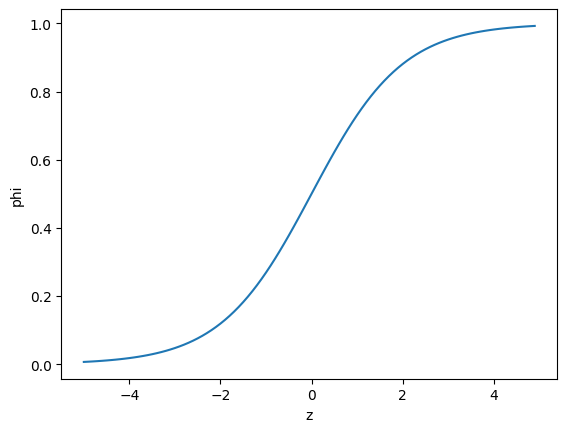

In [32]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

---
# 예측값을 그럴싸한 확률값으로 만들어보기
- 두 가지를 하면 되는데
    - 1. 회귀 모델로 실수값을 예측하도록 한다.
    - 2. 실수값을 sigmoid에 통과시켜서 확률값으로 만든다.

---
# 이진 분류부터 해보기
- 본 실습을 들어가기 전에, 간단한 이진 분류부터 연습해보며 감을 잡자.

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 비트OR연산자 (or는 안됨. 이유는 모름)
train_bream_smelt = train_input_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

len(train_bream_smelt) # bream, smelt만 걸러내면 33개의 샘플이 나옴

33

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt))
print(lr.predict_proba(train_bream_smelt))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']
[[9.97600072e-01 2.39992835e-03]
 [2.73732464e-02 9.72626754e-01]
 [9.94863864e-01 5.13613552e-03]
 [9.85850468e-01 1.41495320e-02]
 [9.97674186e-01 2.32581351e-03]
 [3.19535028e-02 9.68046497e-01]
 [9.73134460e-01 2.68655405e-02]
 [9.99533281e-01 4.66718913e-04]
 [9.86839274e-01 1.31607262e-02]
 [9.02332611e-01 9.76673891e-02]
 [9.98452905e-01 1.54709455e-03]
 [9.97614636e-01 2.38536358e-03]
 [9.96917597e-01 3.08240349e-03]
 [3.78325110e-02 9.62167489e-01]
 [9.99594878e-01 4.05122141e-04]
 [3.34456405e-02 9.66554359e-01]
 [7.48443959e-02 9.25155604e-01]
 [9.79930510e-01 2.00694898e-02]
 [9.99386557e-01 6.13442824e-04]
 [9.71091313e-01 2.89086870e-02]
 [9.81853073e-01 1.81469269e-02]
 [9.84921047e-01 1.50789532e-02]
 [9.6

학습한 계수값 확인해보기

In [41]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


- 로지스틱 회귀 모델이 학습한 방정식은, 다음과 같다.
    - $z = -0.404\text{weight} - 0.576\text{length} - 0.662\text{diagonal} - 1.013\text{height} - 0.731\text{width} - 2.162$
- $z$값을 구하려면, 아래와 같이 `.decision_function()`메서드를 활용한다.

In [43]:
decisions = lr.decision_function(train_bream_smelt)
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688  3.41099831
 -3.58967782 -7.66931655 -4.31727007 -2.22341548 -6.4698283  -6.03601551
 -5.77895847  3.23601973 -7.81091675  3.36381609  2.51455071 -3.88828092
 -7.39580986 -3.51427836 -3.99094045 -4.17926154 -3.25374833 -5.0242727
 -4.23461336  3.18456426 -5.44264864  3.34182307  3.40394191 -2.76321242
  2.48794425 -5.20693508 -4.77384768]


$z$값을 구한 뒤 sigmoid에 넣어주면, 최종적으로 확률값으로 변환시킬 수 있다.

In [ ]:
from scipy.special import expit # sigmoid함수

print(expit(decisions)) # 양성 클래스(1)일 확률

[2.39992835e-03 9.72626754e-01 5.13613552e-03 1.41495320e-02
 2.32581351e-03 9.68046497e-01 2.68655405e-02 4.66718913e-04
 1.31607262e-02 9.76673891e-02 1.54709455e-03 2.38536358e-03
 3.08240349e-03 9.62167489e-01 4.05122141e-04 9.66554359e-01
 9.25155604e-01 2.00694898e-02 6.13442824e-04 2.89086870e-02
 1.81469269e-02 1.50789532e-02 3.71924297e-02 6.53340168e-03
 1.42785787e-02 9.60249253e-01 4.30935384e-03 9.65836049e-01
 9.67827503e-01 5.93447853e-02 9.23292333e-01 5.44858922e-03
 8.37704538e-03]


👉 출력 결과: `.predict_proba()`메서드의 두 번째 컬럼 값과 동일. 즉 `.decision_function()`메서드는 양성 클래스에 대한 z값을 반환한다는 것을 알 수 있음

---
# 다중 분류 문제 진짜 풀어보기
- 이제 진짜로 다중 분류 문제를 풀고, 확률값까지 얻어내보자.
- 로지스틱 회귀는 릿지 회귀처럼 계수의 제곱을 규제함. 다만 `alpha`처럼 값이 클수록 규제 정도가 커지는게 아니라 `C`값은 값이 작을수록 규제 정도가 커짐
- `LogisticReression`클래스의 `multi_class=auto`값으로 이진 분류인지, 다중 분류인지를 명시할 수 있다.
    - 굳이 명시할필요는 없다. 클래스 개수가 두 개라면 이진 분류 문제로 간주하여 알아서 시그모이드를 사용하고, 세 개 이상이라면 다중 분류 문제로 간주하여 알아서 소프트맥스를 사용한다.
- `max_iter`값은 선형 방정식의 계수(모델의 매개변수)를 최적화하기 위해 학습의 양을 지정하는 값이다.

In [45]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_input_scaled, train_target)

print(lr.score(train_input_scaled, train_target))
print(lr.score(test_input_scaled, test_target))

0.9327731092436975
0.925


In [46]:
print(lr.predict(test_input_scaled))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch' 'Bream' 'Smelt' 'Roach' 'Perch'
 'Pike' 'Bream' 'Perch' 'Bream' 'Parkki' 'Bream' 'Bream' 'Perch' 'Perch'
 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch'
 'Roach' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike' 'Bream' 'Perch'
 'Roach' 'Roach' 'Parkki' 'Perch']


In [47]:
prob = lr.predict_proba(test_input_scaled)
print(np.round(prob, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.319 0.014 0.639 0.001 0.018]
 [0.    0.002 0.803 0.002 0.181 0.    0.011]
 [0.    0.    0.022 0.978 0.    0.    0.   ]
 [0.984 0.003 0.    0.    0.001 0.    0.013]
 [0.047 0.    0.817 0.008 0.002 0.    0.126]
 [0.992 0.005 0.    0.    0.    0.    0.003]
 [0.007 0.907 0.002 0.    0.076 0.    0.009]
 [0.999 0.001 0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.001 0.    0.936 0.    0.    0.    0.063]
 [0.001 0.003 0.784 0.009 0.19  0.    0.014]
 [0.001 0.035 0.675 0.004 0.263 0.001 0.021]
 [0.991 0.005 0.    0.    0.    0.    0.003]
 [0.    0.002 0.049 0.    0.008 0.941 0.   ]
 [0.997 0.002 0.    0.    0.    0.    0.   ]
 [0.984 0.

레이블과 계수 정보 확인해보기

In [48]:
print(lr.classes_)
print(lr.coef_.shape, lr.intercept_.shape)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5) (7,)


👉 행의 크기가 7인 이유는, 예측해야하는 클래스가 7개이기 때문이다.

- 즉 선형 방정식에서, 서로 다른 $z$를 7개 계산하는 것
    
    - $z_{\text{Bream}} = a_0 + a_{1,\text{Bream}} \cdot \text{Weight} + a_{2,\text{Bream}} \cdot \text{Length} + a_{3,\text{Bream}} \cdot \text{Diagonal} + a_{4,\text{Bream}} \cdot \text{Height} + a_{5,\text{Bream}} \cdot \text{Width}$
    - $z_{\text{Parkki}} = a_0 + a_{1,\text{Parkki}} \cdot \text{Weight} + a_{2,\text{Parkki}} \cdot \text{Length} + a_{3,\text{Parkki}} \cdot \text{Diagonal} + a_{4,\text{Parkki}} \cdot \text{Height} + a_{5,\text{Parkki}} \cdot \text{Width}$
    - ... (총 7개)
- 이진 분류에서는 sigmoid를 통해 $z$값을 확률값으로 변환했지만, 다중 분류에서는 softmax를 통해 각 레이블의 확률값으로 변환한다.
    - 보통 여러 클래스 중 어떤 입력이 특정 클래스일 확률을 구하는 경우, 즉 $z=[z_1,\dots,z_K]$가 나왔을 때 각 클래스의 확률은 다음과 같이 정의됨 → $P(y=i\mid x)=\frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}\,$
    - 반면 이진 분류나, 각 항목이 독립적으로 참일 확률을 구할 경우에는, 각 로짓에 대해 sigmoid($\sigma(z)=\frac1{1+e^{-z}}$)를 활용

In [49]:
decisions = lr.decision_function(test_input_scaled)
print(np.round(decisions, decimals=2))

[[-6.510e+00  1.040e+00  5.170e+00 -2.760e+00  3.340e+00  3.500e-01
  -6.300e-01]
 [-1.088e+01  1.940e+00  4.780e+00 -2.420e+00  2.990e+00  7.840e+00
  -4.250e+00]
 [-4.340e+00 -6.240e+00  3.170e+00  6.480e+00  2.360e+00  2.430e+00
  -3.870e+00]
 [-6.900e-01  4.500e-01  2.640e+00 -1.210e+00  3.260e+00 -5.700e+00
   1.260e+00]
 [-6.400e+00 -1.990e+00  5.820e+00 -1.300e-01  3.500e+00 -9.000e-02
  -7.000e-01]
 [ 1.669e+01  8.310e+00 -3.350e+00 -4.950e+00  8.500e-01 -2.634e+01
   8.790e+00]
 [-1.235e+01  1.920e+00  5.760e+00 -2.920e+00  3.180e+00  8.690e+00
  -4.280e+00]
 [-2.620e+00 -8.500e-01  2.900e+00 -2.100e-01  3.600e+00 -2.850e+00
   2.000e-02]
 [-3.840e+00 -1.060e+00  4.990e+00 -9.600e-01  3.500e+00 -3.370e+00
   7.400e-01]
 [ 1.670e+00 -1.450e+01  1.047e+01  1.424e+01 -9.300e-01 -1.205e+01
   1.110e+00]
 [ 9.740e+00  3.930e+00 -1.710e+00 -2.410e+00  2.420e+00 -1.737e+01
   5.400e+00]
 [ 4.110e+00 -3.060e+00  6.970e+00  2.360e+00  8.800e-01 -1.637e+01
   5.110e+00]
 [ 1.170e+01  6.

softmax() 적용

In [50]:
from scipy.special import softmax

prob = softmax(decisions, axis=1)
print(np.round(prob, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.319 0.014 0.639 0.001 0.018]
 [0.    0.002 0.803 0.002 0.181 0.    0.011]
 [0.    0.    0.022 0.978 0.    0.    0.   ]
 [0.984 0.003 0.    0.    0.001 0.    0.013]
 [0.047 0.    0.817 0.008 0.002 0.    0.126]
 [0.992 0.005 0.    0.    0.    0.    0.003]
 [0.007 0.907 0.002 0.    0.076 0.    0.009]
 [0.999 0.001 0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.001 0.    0.936 0.    0.    0.    0.063]
 [0.001 0.003 0.784 0.009 0.19  0.    0.014]
 [0.001 0.035 0.675 0.004 0.263 0.001 0.021]
 [0.991 0.005 0.    0.    0.    0.    0.003]
 [0.    0.002 0.049 0.    0.008 0.941 0.   ]
 [0.997 0.002 0.    0.    0.    0.    0.   ]
 [0.984 0.

---
# QA

👉 로지스틱 회귀는 계수값을 어떻게 정하는건가요? 단순히 모델에 데이터의 값을 넣어주면 알아서 적절한 선형 방정식의 계수값을 뿅 뱉어주니까 그 중간과정을 잘 모르겠어요.       

- 사실 로지스틱 회귀뿐만 아니라, 3장에서의 선형 회귀 모델 또한 마찬가지로 선형 방정식의 계수값을 최적화하는식으로 학습이 이루어졌습니다. 즉 이미 한번 나왔던 셈입니다.
- 다만 선형 회귀 모델에서 계수값을 최적화하는 방식이 각각 다른데, LinearRegression클래스는 최소 제곱법, LogisticRegression클래스는 경사 하강법을 통해 계수를 최적화합니다.
- 선형 회귀 모델에서 계수값을 최적화하는 방식은 이와 같이 크게 최소 제곱법과 경사 하강법 두 가지가 존재합니다.
- 또한, 선형 회귀 모델의 성능 평가는 결정 계수, MSE, MAE, RMSE와 같은 방식을 통해 성능을 평가할 수 있습니다.

<br/>
<br/>

👉 왜 학습의 양(`max_iter`)을 어느 정도 크게 해야 모델이 충분히 학습할 수 있는걸까요? 데이터를 한 번만 보고도 완벽하게 학습하도록 할 수는 없는건가요?       

- `LogisticRegression`는 경사 하강법을 통해 선형 방정식의 계수값을 최적화하는데, 이 때 `max_iter`값은 경사 하강법을 몇 번 수행해서 최적화를 수행할것인지를 의미합니다.
- 